In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"D:\Datasets\olympic\athlete_events.csv")
region_data = pd.read_csv(r"D:\Datasets\olympic\noc_regions.csv")

In [5]:
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
data.shape

(271116, 15)

In [7]:
data = data[data['Season']=='Summer']

In [8]:
data.shape

(222552, 15)

In [9]:
region_data

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [10]:
data = data.merge(region_data,on = 'NOC',how = 'left')

In [11]:
data['region'].unique().shape

(206,)

In [12]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
data.duplicated().sum()

1385

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
#data = pd.get_dummies(data,columns = ['Medal'])

In [ ]:
data.head()

In [ ]:
medal_tally = data.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [ ]:
medal_tally

In [ ]:
medal_tally = pd.concat([medal_tally,pd.get_dummies(medal_tally['Medal'])], axis= 1)

In [ ]:
medal_tally.shape

In [ ]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False)

In [ ]:
medal_tally = medal_tally.reset_index()

In [ ]:
medal_tally.head()

In [ ]:
medal_tally['Total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [ ]:
medal_tally.head()

In [ ]:
year = data['Year'].unique().tolist()

In [ ]:
year.sort()

In [ ]:
year.insert(0,'OverAll')

In [ ]:
year

In [ ]:
country = data['region'].dropna().unique().tolist()

In [ ]:
country.sort()

In [ ]:
country.insert(0,'OverAll')

In [ ]:
country

## OverAll Analysis

In [ ]:
data['Year'].nunique() - 1 # as 1906  Olympics is not calculated as olympic

In [ ]:
data['City'].unique()

In [ ]:
data['Sport'].nunique()

In [ ]:
data['Event'].nunique()

In [ ]:
data['Name'].nunique()

In [ ]:
data['region'].nunique()

In [ ]:
nations_over_time = data[['Year','region']].drop_duplicates()['Year'].value_counts().reset_index().sort_values('index')

In [ ]:
nations_over_time.rename(columns={'index':'Edition','Year':'No of Countries'},inplace=True)

In [ ]:
nations_over_time

In [47]:
import plotly.express as px

In [ ]:
fig = px.line(nations_over_time, x = 'Edition', y = "No of Countries")
fig.show()

In [ ]:
data[['Year','Event']].drop_duplicates()['Year'].value_counts().reset_index().sort_values('index')

In [ ]:
data.columns

In [ ]:
x = data.drop_duplicates(['Year','Sport','Event'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index = 'Sport',columns='Year',values = 'Event',aggfunc='count',fill_value=0), annot=True)

In [ ]:
def most_succesful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])
    
    if sport != 'OverAll':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(data,left_on = 'index',right_on = 'Name',
                                                                       how = 'left')[['index','Name_x','Sport',
                                                                                      'region']].drop_duplicates('index')
    
    x.rename(columns= {'index':'Name', 'Name_x':'Medals'},inplace = True)
    return x

In [ ]:
most_succesful(data,'Hockey')

# CountryWise

1) country wise medal tally per year       
2) What countries are good at        
3) Most successfull atheletes

In [ ]:
temp_df = data.dropna(subset = 'Medal')
temp_df.drop_duplicates(subset= ['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [ ]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [ ]:
fig = px.line(final_df, x = 'Year', y = "Medal")
fig.show()

In [ ]:
new_df = temp_df[temp_df['region']=='UK']
plt.figure(figsize = (15,15))
    sns.heatmap(new_df.pivot_table(index = 'Sport',columns = 'Year',values = 'Medal', aggfunc='count',fill_value=0), annot=True)

In [ ]:
def most_succesful_athelete_countrywise(df,country):
    
    temp_df = df.dropna(subset = ['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(10).merge(data,left_on = 'index',right_on = 'Name',
                                                                       how = 'left')[['index','Name_x','Sport',
                                                                                      ]].drop_duplicates('index')
    
    x.rename(columns= {'index':'Name', 'Name_x':'Medals'},inplace = True)
    return x

In [ ]:
most_succesful_athelete_countrywise(data,'JAMAI')

In [3]:
import plotly.figure_factory as ff

In [16]:
athlete_df = data.drop_duplicates(['Name','region'])

In [17]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [30]:
fig = ff.create_distplot([x1,x2,x3,x4],['OverAll','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [20]:
athlete_df['Medal'].fillna('No Medal',inplace = True)

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Apoorv\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Height', ylabel='Weight'>

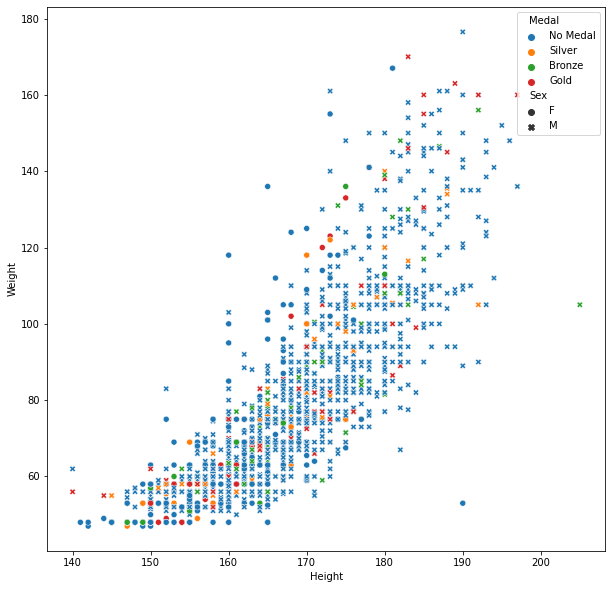

In [35]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport']=='Weightlifting']
sns.scatterplot(temp_df['Height'],temp_df['Weight'], hue = temp_df['Medal'],style = temp_df['Sex'])

In [38]:
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [44]:
final = men.merge(women, on='Year', how = 'left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [46]:
final.fillna(0,inplace = True)

In [49]:
fig = px.line(final,x = 'Year',y = ['Male','Female'])
fig.show()

In [50]:
final

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0
